In [425]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_selector as selector

In [426]:
df = pd.read_csv('/content/car_prices_dataset.csv')
df.head()

,Make,Model,Year,Mileage,Engine Size (L),Fuel Type,Transmission,Horsepower,Number of Doors,Price ($)
0,Chevrolet,Cruze,2005,41531,3.3,Diesel,Automatic,272,2,5502.62
1,Honda,Accord,2019,129606,1.1,Diesel,Manual,208,4,11718.97
2,Honda,CR-V,2018,95481,3.7,Diesel,Automatic,425,2,16061.98
3,Audi,A6,2021,122983,2.0,Electric,Automatic,261,2,27599.81
4,Mercedes,GLA,2019,105776,2.5,Electric,Automatic,113,4,37560.61


In [427]:
df.shape

(100, 10)

In [428]:
x = df.drop(['Price ($)'], axis=1)
y = df['Price ($)']

In [429]:
x.shape

(100, 9)

In [430]:
y.shape

(100,)

In [431]:
#Convert categorical variables (e.g., make, model, fuel type) into numerical values using techniques like one-hot encoding.
x = pd.get_dummies(x, columns=['Make', 'Model', 'Fuel Type','Transmission'])


In [432]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [433]:
corr_matrix = x_train.corr()
print(corr_matrix)

                            Year   Mileage  Engine Size (L)  Horsepower  \
Year                    1.000000  0.145431        -0.108826   -0.104659   
Mileage                 0.145431  1.000000        -0.149620   -0.058953   
Engine Size (L)        -0.108826 -0.149620         1.000000   -0.088334   
Horsepower             -0.104659 -0.058953        -0.088334    1.000000   
Number of Doors        -0.108548  0.037101        -0.139572    0.003366   
Make_Audi               0.039533 -0.156670        -0.221181    0.121296   
Make_BMW               -0.075040  0.310000        -0.020526    0.036763   
Make_Chevrolet          0.055036  0.059427         0.112951    0.024497   
Make_Ford               0.152057 -0.006157        -0.153607    0.165314   
Make_Honda              0.008527  0.038074         0.069369   -0.004542   
Make_Hyundai            0.070251 -0.141941         0.043605   -0.037721   
Make_Kia               -0.216268  0.024426         0.171061   -0.190693   
Make_Mercedes           0

In [434]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [435]:
y_pred = model.predict(x_test)

In [436]:
mse= mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [437]:
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 2894868.173476306
R-squared: 0.9746285130648538


In [438]:
print("Coefficients:")
print(model.coef_)

Coefficients:
[ 8.07356044e+02 -3.39347500e-02  1.57040677e+03 -3.00694898e-01
 -3.53760948e+01  5.47857633e+03  8.46664253e+03 -3.62457492e+03
 -1.96541848e+03 -3.43771424e+03 -4.87283414e+03 -5.71329960e+03
  1.26439579e+04 -5.46254050e+03 -1.51279491e+03  7.24800514e+02
  4.18298302e+03  8.00451489e+02  2.98871790e+03 -5.02513395e+02
  3.61796324e+03 -9.15155930e+02 -2.20746381e+03 -2.02004491e+03
 -1.77998575e+03 -2.46266209e+03  3.04313041e+03 -8.66704102e+02
 -1.71905168e+03 -1.22445164e+03 -5.93283977e+02 -1.47682861e+02
  5.98286426e+03 -4.84058111e+02  5.57138837e+02 -3.41409185e+03
 -5.03041615e+02  1.68940695e+03 -1.47509093e+03 -2.98461620e+03
 -1.93129783e+02 -2.10607796e+03 -5.25695182e+02 -1.02151384e+03
  3.55885899e+03 -4.74913381e+02 -2.96104228e+02  4.36710863e+02
  3.34306746e+02  1.04744379e+02 -1.04744379e+02]


In [439]:
# Mean Squared Error (MSE): 2894868.17

# The MSE is a measure of the average squared difference between the predicted and actual values. In this case, the MSE is approximately 2.9 million. This value indicates that the model is not very accurate in predicting the prices of cars. A lower MSE would be desirable.

# R-squared: 0.97

# The R-squared value, also known as the coefficient of determination, measures how well the model explains the variance in the target variable (Price). A value of 0.97 indicates that the model explains about 97% of the variance in the Price variable. This is a relatively high value, suggesting that the model is doing a good job of capturing the relationships between the features and the target variable.

# The coefficients for the categorical variables (Make, Model, Fuel Type, Transmission) are relatively small, suggesting that these variables have a smaller impact on Price compared to the numerical variables. The coefficients for the numerical variables (Year, Mileage, Engine Size, Horsepower, Number of Doors) are generally larger, indicating that these variables have a more significant impact on Price.

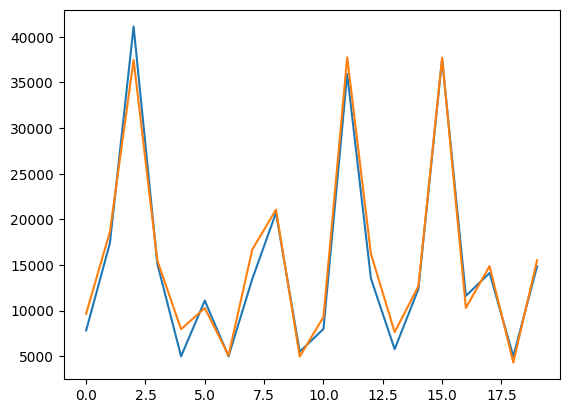

In [440]:
import matplotlib.pyplot as plt

plt.plot(range(0,len(y_test)),y_test)
plt.plot(range(0,len(y_test)),y_pred)
plt.show()


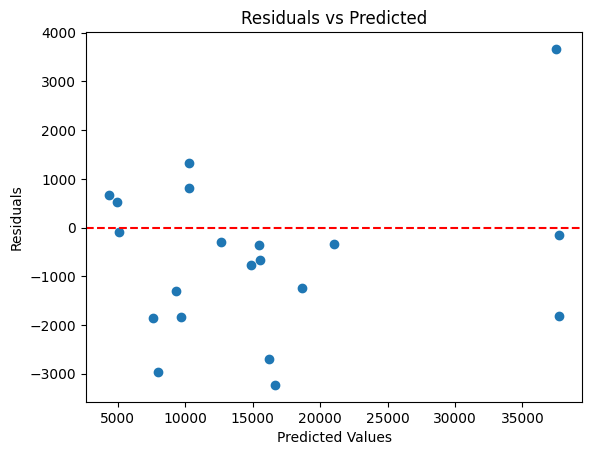

In [441]:
residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')
plt.show()

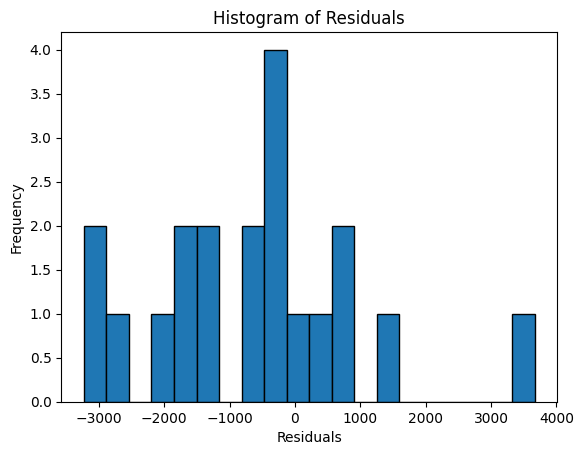

In [442]:
plt.hist(residuals, bins=20, edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

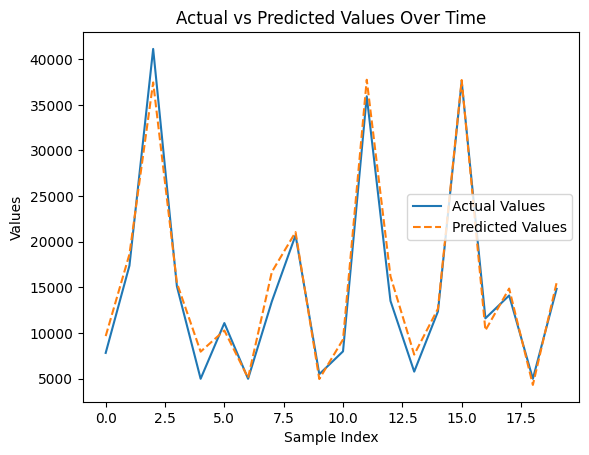

In [443]:
plt.plot(y_test.values, label='Actual Values')
plt.plot(y_pred, label='Predicted Values', linestyle='--')
plt.xlabel('Sample Index')
plt.ylabel('Values')
plt.title('Actual vs Predicted Values Over Time')
plt.legend()
plt.show()

In [444]:
# Number of Doors' has a weak correlation with the 'Price ($)'. However, it might still be relevant to keep it if there are specific business requirements.
# 'Make' and 'Model' are categorical features that need to be preprocessed and encoded before using them in a predictive model. One-hot encoding or ordinal encoding can be used depending on the nature of the data.
# 'Fuel Type' and 'Transmission' have weak correlations with the 'Price ($)'. However, they might still be relevant to keep if there are specific business requirements. Encoding these categorical features would also be necessary.
# 'Engine Size (L)' and 'Horsepower' have a moderate correlation with the 'Price ($)'. These features are likely to be important for predicting the car price.
# 'Year' and 'Mileage' have a strong correlation with the 'Price ($)'. These features are likely to be important for predicting the car price.